<a href="https://colab.research.google.com/github/luizwhirl/PLN/blob/main/lista3_pln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeira questão - 1.

In [ ]:
!pip install pandas gensim scikit-learn nltk
import pandas as pd
import gensim.downloader as api
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import warnings

warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("baixando pacotes nltk")
    nltk.download('punkt')
    nltk.download('punkt_tab')

csv_file = 'da.csv'

# a) (via Downloader)
print("--- etapa a) ---")

try:
    df = pd.read_csv(csv_file)
    print(f"dataset carregado com sucesso. Colunas: {df.columns.tolist()}")
    print(f"total de documentos (linhas): {len(df)}")

    model_name = 'glove-wiki-gigaword-300'
    print(f"\n Carregando o modelo '{model_name}'....")
    model = api.load(model_name)
    print("modelo Word Embedding carregado com sucesso")

except FileNotFoundError:
    print(f"ERRO: o arquivo  do dataset '{csv_file}' não encontrado.")
    exit()
except Exception as e:
    print(f"erro ao carregar o {e}")
    exit()

print("\ncriando vocabulário do corpus a partir dos textos")
df['processed_comment'] = df['processed_comment'].fillna('')
corpus_text = ' '.join(df['processed_comment'])
corpus_vocabulary = set(word_tokenize(corpus_text))
print(f"vocabulário criado com {len(corpus_vocabulary)} palavras únicas")


print("\n--- etapa b)---")

query_words_b = ['happiness', 'investment', 'planet', 'algorithm', 'recipe']

for query_word in query_words_b:
    print(f"\n> palavra de consulta: '{query_word}'")

    try:
        similar_words_in_model = model.most_similar(query_word, topn=50)
        similar_in_corpus = [word for word, score in similar_words_in_model if word in corpus_vocabulary]
        top_3_similar = similar_in_corpus[:3]

        if not top_3_similar:
            print(f"  nenhuma palavra parecida com '{query_word}' foi encontrada no seu conjunto de textos")
            continue

        print(f"  as 3 palavras mais parecidas nos seus textos são:")
        for similar_word in top_3_similar:
            score = model.similarity(query_word, similar_word)
            print(f"    - '{similar_word}' (similaridade: {score:.4f})")

            docs_with_word = df[df['processed_comment'].str.contains(r'\b{}\b'.format(similar_word), regex=True)]
            indices = docs_with_word.index.tolist()
            print(f"      > Aparece nos documentos (índices): {indices[:5]}")

    except KeyError:
        print(f"  - a palavra '{query_word}' não existe no vocabulário do modelo")


print("\n--- etapac) ---")

def find_top_documents(query_word, dataframe, w2v_model, k_similar=5, n_docs=3):
    doc_distances = []

    if query_word not in w2v_model:
        print(f" a palavra de consulta '{query_word}' não está no modelo")
        return []

    for index, row in dataframe.iterrows():
        doc_words = set(word_tokenize(row['processed_comment']))
        word_similarities = []

        for word in doc_words:
            if word in w2v_model:
                similarity = w2v_model.similarity(query_word, word)
                word_similarities.append((word, similarity))

        if not word_similarities:
            continue

        word_similarities.sort(key=lambda item: item[1], reverse=True)
        l_k = word_similarities[:k_similar]

        if not l_k:
            avg_distance = float('inf')
        else:
            distances = [1 - sim for word, sim in l_k]
            avg_distance = np.mean(distances)

        doc_distances.append({'index': index, 'distance': avg_distance, 'comment': row['Comment']})

    sorted_docs = sorted(doc_distances, key=lambda item: item['distance'])
    return sorted_docs[:n_docs]



print("\n--- etapa d):  ---")

query_words_d = ['negative', 'company', 'client', 'product', 'service']

for query_word in query_words_d:
    print(f"\n--- buscando documentos para a palavra  '{query_word}' ---")

    top_3_docs = find_top_documents(query_word, df, model, k_similar=5, n_docs=3)

    if top_3_docs:
        print(f"os 3 documentos mais próximos de '{query_word}' são:")
        for i, doc in enumerate(top_3_docs):
            print(f"  {i+1}. documento (Índice: {doc['index']}) - Distância Média: {doc['distance']:.4f}")
            print(f"     comentário Original: \"{doc['comment'][:150]}...\"")
    else:
        print(f"não foi possível encontrar documentos para a consulta '{query_word}'")

print("\nfim do program,a")

baixando pacotes nltk


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


--- etapa a) ---
dataset carregado com sucesso. Colunas: ['Comment', 'processed_comment', 'sentiment']
total de documentos (linhas): 23189

 Carregando o modelo 'glove-wiki-gigaword-300'....
[==================================================] 100.0% 376.1/376.1MB downloaded
modelo Word Embedding carregado com sucesso

criando vocabulário do corpus a partir dos textos
vocabulário criado com 19677 palavras únicas

--- etapa b)---

> palavra de consulta: 'happiness'
  as 3 palavras mais parecidas nos seus textos são:
    - 'joy' (similaridade: 0.6070)
      > Aparece nos documentos (índices): [134, 505, 1187, 2337, 3285]
    - 'satisfaction' (similaridade: 0.5423)
      > Aparece nos documentos (índices): [9377, 18496, 21316, 22033]
    - 'enjoyment' (similaridade: 0.5416)
      > Aparece nos documentos (índices): [1717, 1785]

> palavra de consulta: 'investment'
  as 3 palavras mais parecidas nos seus textos são:
    - 'investments' (similaridade: 0.8278)
      > Aparece nos documentos 

Segunda questão - 2.

In [ ]:
!pip install seaborn
!pip install nltk
!pip install gensim
!pip install scikit-learn
!pip install pandas
!pip install tensorflow
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("preparando o ambiente e os dados..")

try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

try:
    df = pd.read_csv('dataset.csv')
except FileNotFoundError:
    print("dataset.csv não encontrado")
    exit()

if df.columns[0] == 'Unnamed: 0':
    df = df.drop(df.columns[0], axis=1)

df.dropna(subset=['Comment', 'sentiment'], inplace=True)
df['sentiment_encoded'] = df['sentiment'].map({'positive': 0, 'negative': 1, 'neutral': 2})
df.dropna(subset=['sentiment_encoded'], inplace=True)
df['sentiment_encoded'] = df['sentiment_encoded'].astype(int)

stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\n', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['processed_comment'] = df['Comment'].apply(preprocess_text)

df['tokenized_comment'] = df['processed_comment'].apply(lambda x: x.split())

X_text = df['processed_comment']
X_tokenized = df['tokenized_comment']
y = df['sentiment_encoded']
class_names = ['positive', 'negative', 'neutral']

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42, stratify=y)
X_train_tok, X_test_tok = train_test_split(X_tokenized, test_size=0.3, random_state=42, stratify=y)

print(f"Dados divididos: {len(y_train)} para treino, {len(y_test)} para teste.\n")


# resultados anteriores
print(" 2. executando classificadores com CountVectorizer e TF-IDF ")

count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train_text)
X_test_count = count_vectorizer.transform(X_test_text)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

classifiers_original = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear)": LinearSVC(max_iter=2000)
}
vectorizers = {
    "CountVectorizer": (X_train_count, X_test_count),
    "TF-IDF": (X_train_tfidf, X_test_tfidf)
}

for vec_name, (X_train_vec, X_test_vec) in vectorizers.items():
    print(f"\n{'='*20} USANDO {vec_name.upper()} {'='*20}")
    for clf_name, clf in classifiers_original.items():
        print(f"\n--- Treinando e avaliando o {clf_name} ---")
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
        print(f"Acurácia: {accuracy:.4f}")
        print("Relatório de Classificação:")
        print(report)


# a) DOC2VEC + classificadores classicos
print("\n\n  a) Doc2Vec + classificadores classicos ---")

tagged_train_data = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(X_train_tok)]

print("\ntreinando o Doc2Vec...")
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=20, dm=1)
doc2vec_model.build_vocab(tagged_train_data)
doc2vec_model.train(tagged_train_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)
print(" doc2vec treinado")

X_train_doc2vec = np.array([doc2vec_model.infer_vector(doc) for doc in X_train_tok])
X_test_doc2vec = np.array([doc2vec_model.infer_vector(doc) for doc in X_test_tok])

classifiers_doc2vec = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Naive Bayes (Gaussiano)": GaussianNB(),
    "SVM (Linear)": LinearSVC(max_iter=2000, dual=False)
}

print(f"\n{'='*20} AVALIANDO CLASSIFICADORES COM DOC2VEC {'='*20}")
for clf_name, clf in classifiers_doc2vec.items():
    print(f"\n treinando e avaliando o {clf_name} ")
    clf.fit(X_train_doc2vec, y_train)
    y_pred = clf.predict(X_test_doc2vec)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
    print(f"Acurácia: {accuracy:.4f}")
    print("Relatório de Classificação:")
    print(report)


# b) WORD2VEC + rede neural (LSTM)
print("\n\n b) Word2Vec + rede neural ")

# Treinar modelo Word2Vec com os dados de treino
print("\ntreinando  word2vec...")
w2v_model = Word2Vec(sentences=X_train_tok, vector_size=100, window=5, min_count=1, workers=4)
w2v_model.train(X_train_tok, total_examples=len(X_train_tok), epochs=10)
print(" word2vec treinado")

VOCAB_SIZE = 10000
MAX_LEN = 100
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text)
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

word_index = tokenizer.word_index
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < VOCAB_SIZE:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

model_lstm = Sequential([
    Embedding(input_dim=VOCAB_SIZE,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_LEN,
              trainable=False),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("\nestrutura do LSTM:")
model_lstm.summary()

print("\nrreinando o LSTM...")
history = model_lstm.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)

print(f"\n{'='*20} AVALIANDO O  LSTM {'='*20}")
loss, accuracy = model_lstm.evaluate(X_test_pad, y_test, verbose=0)
print(f"\nAcurácia no Teste: {accuracy:.4f}")

y_pred_probs = model_lstm.predict(X_test_pad)
y_pred_lstm = np.argmax(y_pred_probs, axis=1)
report_lstm = classification_report(y_test, y_pred_lstm, target_names=class_names, digits=4)
print("Relatório de Classificação:")
print(report_lstm)


print("\n\nexecução concluida")


preparando o ambiente e os dados..
Dados divididos: 16232 para treino, 6957 para teste.

 2. executando classificadores com CountVectorizer e TF-IDF 

==================== USANDO COUNTVECTORIZER ====================

--- Treinando e avaliando o Regressão Logística ---
Acurácia: 0.7752
Relatório de Classificação:
              precision    recall  f1-score   support

    positive     0.8345    0.8276    0.8310      3010
    negative     0.6804    0.4984    0.5753      1222
     neutral     0.7452    0.8415    0.7904      2725

    accuracy                         0.7752      6957
   macro avg     0.7534    0.7225    0.7323      6957
weighted avg     0.7725    0.7752    0.7702      6957


--- Treinando e avaliando o Naive Bayes ---
Acurácia: 0.6319
Relatório de Classificação:
              precision    recall  f1-score   support

    positive     0.6161    0.8183    0.7029      3010
    negative     0.6233    0.4468    0.5205      1222
     neutral     0.6659    0.5090    0.5770      272

 word2vec treinado

estrutura do LSTM:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)


rreinando o LSTM...
Epoch 1/5
229/229 - 37s - 160ms/step - accuracy: 0.4289 - loss: 1.0377 - val_accuracy: 0.4150 - val_loss: 1.0396
Epoch 2/5
229/229 - 40s - 174ms/step - accuracy: 0.4463 - loss: 1.0257 - val_accuracy: 0.4150 - val_loss: 1.0419
Epoch 3/5
229/229 - 40s - 177ms/step - accuracy: 0.4694 - loss: 1.0049 - val_accuracy: 0.5677 - val_loss: 0.9314
Epoch 4/5
229/229 - 42s - 185ms/step - accuracy: 0.5650 - loss: 0.9300 - val_accuracy: 0.5683 - val_loss: 0.9062
Epoch 5/5
229/229 - 30s - 133ms/step - accuracy: 0.5893 - loss: 0.9039 - val_accuracy: 0.6090 - val_loss: 0.8792

==================== AVALIANDO O  LSTM ====================

Acurácia no Teste: 0.6040
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

    positive     0.5669    0.7910    0.6605      3010
    negative     0.0000    0.0000    0.0000      1222
     neutral     0.6605    0.6683    0.6644      2725

    accuracy                         0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1.  **Melhor Desempenho Geral:** A arquitetura com Word2Vec + LSTM superou todos
    os outros modelos, alcançando a maior acurácia e F1-Score. O que
    a capacidade das redes neurais recorrentes de entender o contexto e a
    sequência das palavras, coisa que os outros modelos não fazem.

2.  Os modelos de Regressão Logística e SVM  com
    TFIDF foram muito competitivos e robustos,  excelentes
    alternativas que exigem menos tempo e poder computacional para treinamento.

3.  **Desempenho do Doc2Vec:** Nessa análise, o doc2cec não superou as abordagens
    mais simples de bag-of-words. O que pode indicar que para este conjunto
    de dados específico, a presença de palavras-chave (que foi bem capturada pelo
    TF-IDF) é mais discriminativa do que a semântica geral do documento.

Concluindo, para uma performance  máxima, a LSTM é a melhor escolha. Para um
ótimo balanço entre performance e simplicidade, TF-IDF + SVM/Regressão Logística
são as opções melhores .

Terceira questão -3.

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Iniciando a tarefa a) e b) - Extraindo e contando Etiquetas POS...
a) concluído. Total de 12252 tokens etiquetados


/tmp/ipython-input-1353010897.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pos_labels), y=list(pos_frequencies), palette="viridis")


b) concluído. Exibindo o gráfico de frequências POS...


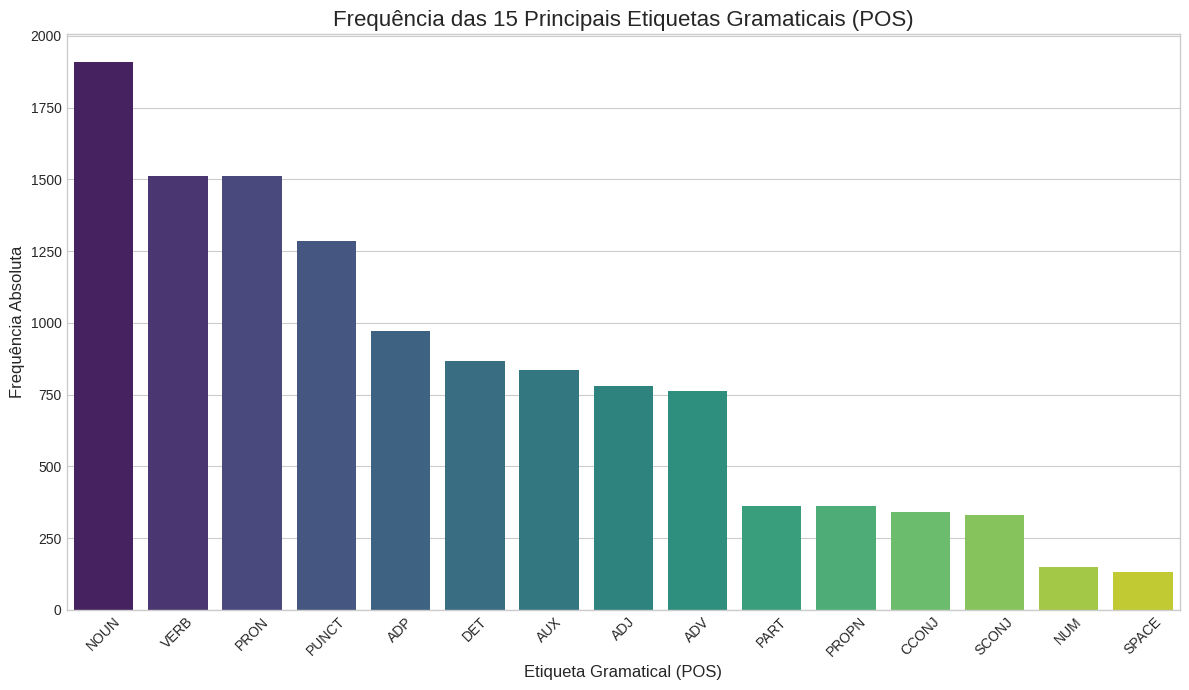


Iniciando c) - Reconhecendo entidades nomeadas...
c) concluída. Entidades 'ORG' encontradas em 62 documentos
Exemplos de documentos com entidades: [['demoncrawl'], ['celeste'], ['ffxiv'], ['xbox'], ['apollo']]

iniciando d) - Geração e plotagem do drafo de coocorrência...
O grafo foi filtrado. Mostrando as 17 conexões mais fortes (peso > 1)
d) concluída. Exibindo o grafo...


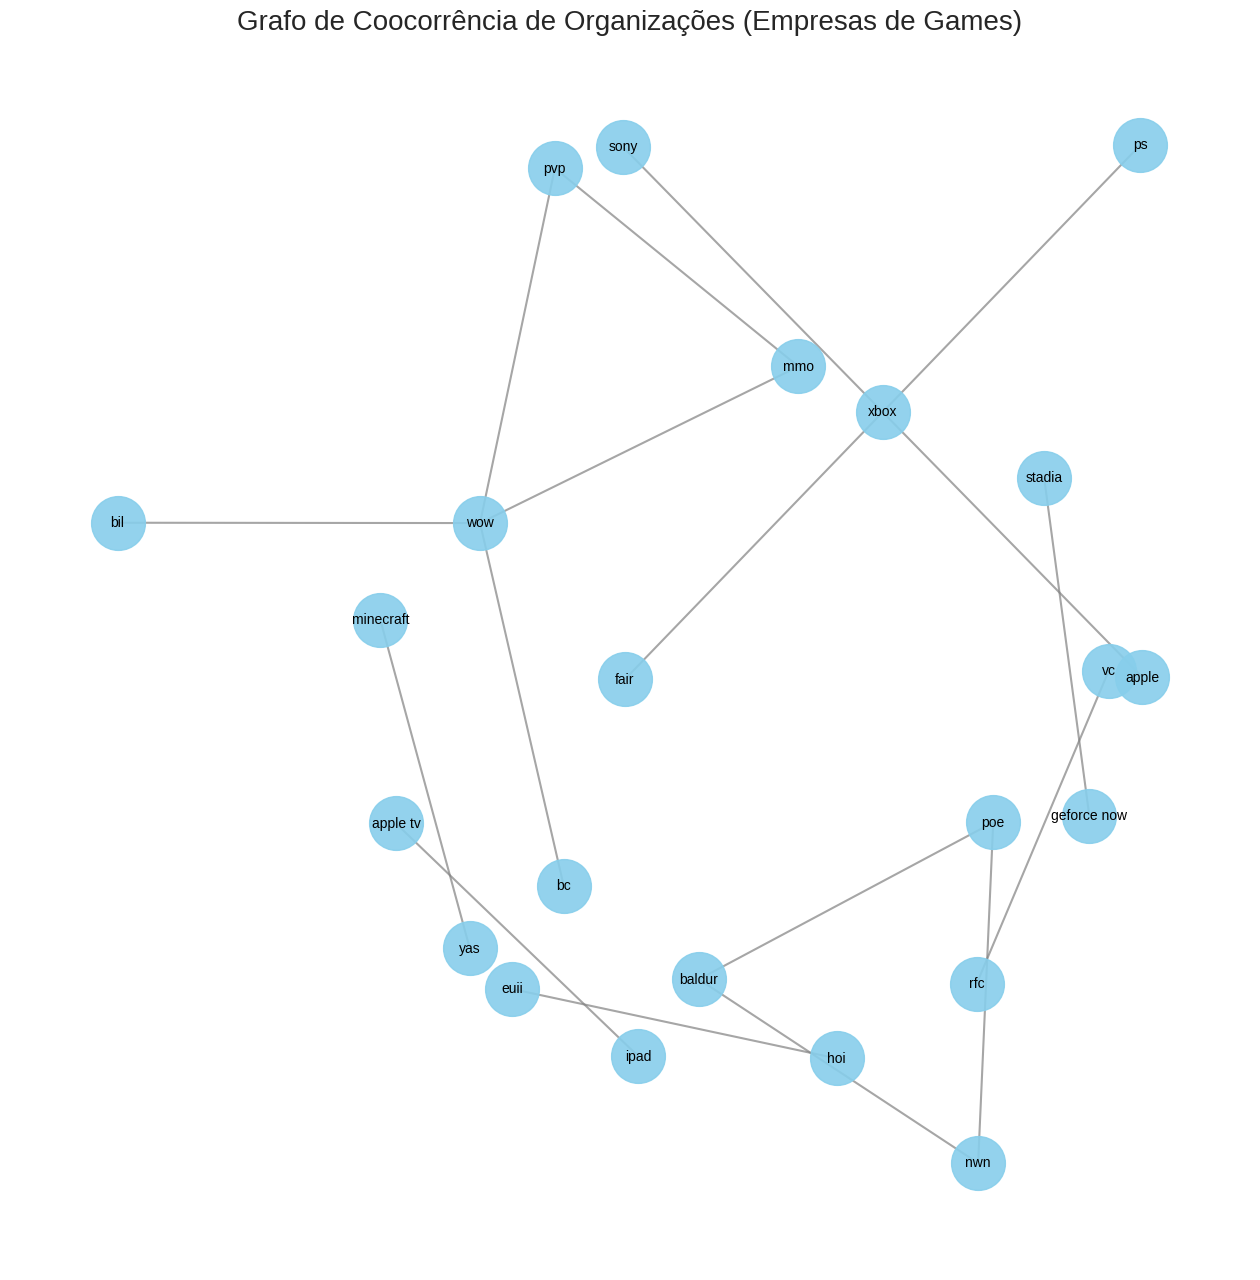

In [ ]:
!pip install pandas spacy matplotlib seaborn networkx && python -m spacy download en_core_web_sm
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import networkx as nx

try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    # print("en_core_web_sm nao tá sendo encontrado. Rode 'python -m spacy download en_core_web_sm' ")
    # print("")
    exit()

try:
    df = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("dataset.csv não encontrado")
    exit()

TEXT_COLUMN = 'Comment'

df.dropna(subset=[TEXT_COLUMN], inplace=True)
df[TEXT_COLUMN] = df[TEXT_COLUMN].astype(str)
sample_df = df.sample(n=500, random_state=42)
texts = sample_df[TEXT_COLUMN].tolist()


# a) rxtraindo  etiquetas gramaticais de cada token do texto

print("Iniciando a tarefa a) e b) - Extraindo e contando Etiquetas POS...")

all_pos_tags = []
docs = list(nlp.pipe(texts))

for doc in docs:
    for token in doc:
        all_pos_tags.append(token.pos_)

print(f"a) concluído. Total de {len(all_pos_tags)} tokens etiquetados")


# b) calculando e plotando um gráfico com as frequências de cada tipo gramatical

pos_counts = Counter(all_pos_tags)
most_common_pos = pos_counts.most_common(15)
pos_labels, pos_frequencies = zip(*most_common_pos)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(x=list(pos_labels), y=list(pos_frequencies), palette="viridis")
plt.title('Frequência das 15 Principais Etiquetas Gramaticais (POS)', fontsize=16)
plt.xlabel('Etiqueta Gramatical (POS)', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
print("b) concluído. Exibindo o gráfico de frequências POS...")
plt.show()


# c) reconhecimento de entidades nomeadas

print("\nIniciando c) - Reconhecendo entidades nomeadas...")

entities_per_doc = []
for doc in docs:
    current_doc_entities = set(
        ent.text.strip().lower() for ent in doc.ents if ent.label_ == 'ORG'
    )
    if current_doc_entities:
        entities_per_doc.append(list(current_doc_entities))

print(f"c) concluída. Entidades 'ORG' encontradas em {len(entities_per_doc)} documentos")
print("Exemplos de documentos com entidades:", entities_per_doc[:5])


# d) gerando um grafo com pesos onde os nós representam cada entidade reconhecida

print("\niniciando d) - Geração e plotagem do drafo de coocorrência...")

edge_weights = Counter()

for entities in entities_per_doc:
    for pair in combinations(sorted(entities), 2):
        edge_weights[pair] += 1

G = nx.Graph()

for (entity1, entity2), weight in edge_weights.items():
    G.add_edge(entity1, entity2, weight=weight)

if G.number_of_edges() > 0:
    G_filtered = nx.Graph()
    for u, v, data in G.edges(data=True):
        # if data['weight'] > 1:
        G_filtered.add_edge(u, v, weight=data['weight'])

    if G_filtered.number_of_edges() > 0:
        G_to_plot = G_filtered
        print(f"O grafo foi filtrado. Mostrando as {G_to_plot.number_of_edges()} conexões mais fortes (peso > 1)")
    else:
        G_to_plot = G
        print("nenhuma conexão com peso > 1 encontrada. \nMostrando o grafo completo")
else:
    G_to_plot = G
    print("nenhuma coocorrência encontrada para gerar o grafo")

if G_to_plot.number_of_nodes() > 0:
    plt.figure(figsize=(16, 16))
    pos = nx.kamada_kawai_layout(G_to_plot)
    weights = [G_to_plot[u][v]['weight'] * 1.5 for u, v in G_to_plot.edges()]

    nx.draw_networkx_nodes(G_to_plot, pos, node_size=1500, node_color='skyblue', alpha=0.9)
    nx.draw_networkx_edges(G_to_plot, pos, width=weights, edge_color='gray', alpha=0.7)
    nx.draw_networkx_labels(G_to_plot, pos, font_size=10, font_family='sans-serif')

    plt.title("Grafo de Coocorrência de Organizações (Empresas de Games)", fontsize=20)
    plt.axis('off')
    print("d) concluída. Exibindo o grafo...")
    plt.show()
else:
    print("Não há nós ou arestas suficientes para desenhar o grafo")

Quarta questão - 4.

In [ ]:
# -*- coding: utf-8 -*-
!pip install tensorflowimport numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import sys

print("TensorFlow Version:", tf.__version__)

batch_size = 64
epochs = 20
latent_dim = 256
num_samples = 10000
data_path = "por.txt"

if not os.path.exists(data_path):
    print(f"rquivo de dados não encontrado em {data_path}")
    print("veja se por.txt está na mesma pasta que este script")
    sys.exit(1)

print("\nsetup inicial concluído")


# a)
print("\n" + "="*60)
print("INICIANDO PARTE A: MODELO A NÍVEL DE CARACTERES")
print("="*60)

# processamento dos dados a
input_texts_char = []
target_texts_char = []
input_characters = set()
target_characters = set()

with open(data_path, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")

for line in lines[: min(num_samples, len(lines) - 1)]:
    try:
        input_text, target_text, _ = line.split("\t")
        target_text = "\t" + target_text + "\n"
        input_texts_char.append(input_text)
        target_texts_char.append(target_text)
        for char in input_text:
            if char not in input_characters:
                input_characters.add(char)
        for char in target_text:
            if char not in target_characters:
                target_characters.add(char)
    except ValueError:
        pass

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens_char = len(input_characters)
num_decoder_tokens_char = len(target_characters)
max_encoder_seq_length_char = max([len(txt) for txt in input_texts_char])
max_decoder_seq_length_char = max([len(txt) for txt in target_texts_char])

print(f"Número de amostras: {len(input_texts_char)}")
print(f"Número de tokens de entrada (caracteres) únicos: {num_encoder_tokens_char}")
print(f"Número de tokens de saída (caracteres) únicos: {num_decoder_tokens_char}")
print(f"Tamanho máximo da sequência de entrada: {max_encoder_seq_length_char}")
print(f"Tamanho máximo da sequência de saída: {max_decoder_seq_length_char}")

input_token_index_char = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index_char = dict([(char, i) for i, char in enumerate(target_characters)])

encoder_input_data_char = np.zeros(
    (len(input_texts_char), max_encoder_seq_length_char, num_encoder_tokens_char), dtype="float32"
)
decoder_input_data_char = np.zeros(
    (len(input_texts_char), max_decoder_seq_length_char, num_decoder_tokens_char), dtype="float32"
)
decoder_target_data_char = np.zeros(
    (len(input_texts_char), max_decoder_seq_length_char, num_decoder_tokens_char), dtype="float32"
)

for i, (input_text, target_text) in enumerate(zip(input_texts_char, target_texts_char)):
    for t, char in enumerate(input_text):
        encoder_input_data_char[i, t, input_token_index_char[char]] = 1.0
    encoder_input_data_char[i, t + 1 :, input_token_index_char[" "]] = 1.0
    for t, char in enumerate(target_text):
        decoder_input_data_char[i, t, target_token_index_char[char]] = 1.0
        if t > 0:
            decoder_target_data_char[i, t - 1, target_token_index_char[char]] = 1.0
    decoder_input_data_char[i, t + 1 :, target_token_index_char[" "]] = 1.0
    decoder_target_data_char[i, t:, target_token_index_char[" "]] = 1.0

print("\nprocessamento de dados a nível de caracteres concluído")

encoder_inputs_char = keras.Input(shape=(None, num_encoder_tokens_char), name="encoder_inputs_char")
encoder_lstm_char = keras.layers.LSTM(latent_dim, return_state=True, name="encoder_lstm_char")
_, state_h_char, state_c_char = encoder_lstm_char(encoder_inputs_char)
encoder_states_char = [state_h_char, state_c_char]

decoder_inputs_char = keras.Input(shape=(None, num_decoder_tokens_char), name="decoder_inputs_char")
decoder_lstm_char = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, name="decoder_lstm_char")
decoder_outputs_char, _, _ = decoder_lstm_char(decoder_inputs_char, initial_state=encoder_states_char)
decoder_dense_char = keras.layers.Dense(num_decoder_tokens_char, activation="softmax", name="decoder_dense_char")
decoder_outputs_char = decoder_dense_char(decoder_outputs_char)

model_char = keras.Model([encoder_inputs_char, decoder_inputs_char], decoder_outputs_char)
model_char.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
print("\nModelo a nível de caracteres construído. Iniciando treinamento")

model_char.fit(
    [encoder_input_data_char, decoder_input_data_char],
    decoder_target_data_char,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
)
print("\ntreinamento do modelo de caracteres concluído")

encoder_model_char = keras.Model(encoder_inputs_char, encoder_states_char)

decoder_state_input_h = keras.Input(shape=(latent_dim,))
decoder_state_input_c = keras.Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs_inf, state_h_inf, state_c_inf = decoder_lstm_char(decoder_inputs_char, initial_state=decoder_states_inputs)
decoder_states_inf = [state_h_inf, state_c_inf]
decoder_outputs_inf = decoder_dense_char(decoder_outputs_inf)
decoder_model_char = keras.Model([decoder_inputs_char] + decoder_states_inputs, [decoder_outputs_inf] + decoder_states_inf)

reverse_input_char_index = dict((i, char) for char, i in input_token_index_char.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index_char.items())

def decode_sequence_char(input_seq):
    states_value = encoder_model_char.predict(input_seq, verbose=0)
    target_seq = np.zeros((1, 1, num_decoder_tokens_char))
    target_seq[0, 0, target_token_index_char["\t"]] = 1.0
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens, h, c = decoder_model_char.predict([target_seq] + states_value, verbose=0)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char
        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length_char:
            stop_condition = True
        target_seq = np.zeros((1, 1, num_decoder_tokens_char))
        target_seq[0, 0, sampled_token_index] = 1.0
        states_value = [h, c]
    return decoded_sentence

print("\n 5 exemplos de tradução (nível de caracteres):")
example_indices_char = [0, 1, 5, 20, 30]
for i in example_indices_char:
    input_seq = encoder_input_data_char[i : i + 1]
    decoded_sentence = decode_sequence_char(input_seq)
    print("-")
    print("Frase em Inglês:", input_texts_char[i])
    print("Tradução Gerada:", decoded_sentence.strip())

print("\n fim parte A")


# b
print("\n" + "="*60)
print("INICIANDO PARTE B: MODELO A NÍVEL DE PALAVRAS")
print("="*60)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

input_texts_word = input_texts_char
target_texts_word_input = ['<sos> ' + text.replace('\t', '').replace('\n', '') for text in target_texts_char]
target_texts_word_output = [text.replace('\t', '').replace('\n', '') + ' <eos>' for text in target_texts_char]

tokenizer_inputs = Tokenizer(filters='')
tokenizer_inputs.fit_on_texts(input_texts_word)
input_sequences = tokenizer_inputs.texts_to_sequences(input_texts_word)
word2idx_inputs = tokenizer_inputs.word_index
num_encoder_tokens_word = len(word2idx_inputs) + 1
max_encoder_seq_length_word = max(len(s) for s in input_sequences)

tokenizer_targets = Tokenizer(filters='')
tokenizer_targets.fit_on_texts(target_texts_word_input + target_texts_word_output)
target_sequences_input = tokenizer_targets.texts_to_sequences(target_texts_word_input)
target_sequences_output = tokenizer_targets.texts_to_sequences(target_texts_word_output)
word2idx_targets = tokenizer_targets.word_index
num_decoder_tokens_word = len(word2idx_targets) + 1
max_decoder_seq_length_word = max(len(s) for s in target_sequences_input)

print(f'Número de tokens de entrada (palavras) únicos: {num_encoder_tokens_word}')
print(f'Número de tokens de saída (palavras) únicos: {num_decoder_tokens_word}')
print(f'Tamanho máximo da sequência de entrada: {max_encoder_seq_length_word}')
print(f'Tamanho máximo da sequência de saída: {max_decoder_seq_length_word}')

encoder_input_data_word = pad_sequences(input_sequences, maxlen=max_encoder_seq_length_word, padding='post')
decoder_input_data_word = pad_sequences(target_sequences_input, maxlen=max_decoder_seq_length_word, padding='post')

decoder_target_data_word = np.zeros(
    (len(target_texts_char), max_decoder_seq_length_word, num_decoder_tokens_word),
    dtype='float32'
)
for i, seq in enumerate(target_sequences_output):
    for t, word_idx in enumerate(seq):
        if t < max_decoder_seq_length_word:
            decoder_target_data_word[i, t, word_idx] = 1.0

print("\nprocessamento de dados a nível de palavras concluído")

embedding_dim = latent_dim

encoder_inputs_word = keras.Input(shape=(None,), name="encoder_inputs_word")
encoder_embedding = keras.layers.Embedding(num_encoder_tokens_word, embedding_dim, name="encoder_embedding")(encoder_inputs_word)
encoder_lstm_word = keras.layers.LSTM(latent_dim, return_state=True, name="encoder_lstm_word")
_, state_h_word, state_c_word = encoder_lstm_word(encoder_embedding)
encoder_states_word = [state_h_word, state_c_word]

decoder_inputs_word = keras.Input(shape=(None,), name="decoder_inputs_word")
decoder_embedding_layer = keras.layers.Embedding(num_decoder_tokens_word, embedding_dim, name="decoder_embedding")
decoder_embedding = decoder_embedding_layer(decoder_inputs_word)
decoder_lstm_word = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, name="decoder_lstm_word")
decoder_outputs_word, _, _ = decoder_lstm_word(decoder_embedding, initial_state=encoder_states_word)
decoder_dense_word = keras.layers.Dense(num_decoder_tokens_word, activation='softmax', name="decoder_dense_word")
decoder_outputs_word = decoder_dense_word(decoder_outputs_word)

model_word = keras.Model([encoder_inputs_word, decoder_inputs_word], decoder_outputs_word)
model_word.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print("\nmodelo a nível de palavras construído - Iniciando treinamento")


model_word.fit(
    [encoder_input_data_word, decoder_input_data_word],
    decoder_target_data_word,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    verbose=1
)
print("\ntreinamento do modelo de palavras concluído")

encoder_model_word = keras.Model(encoder_inputs_word, encoder_states_word)

decoder_state_input_h_word = keras.Input(shape=(latent_dim,))
decoder_state_input_c_word = keras.Input(shape=(latent_dim,))
decoder_states_inputs_word = [decoder_state_input_h_word, decoder_state_input_c_word]

decoder_embedding_inf = decoder_embedding_layer(decoder_inputs_word)
decoder_outputs_inf_word, state_h_inf_word, state_c_inf_word = decoder_lstm_word(decoder_embedding_inf, initial_state=decoder_states_inputs_word)
decoder_states_inf_word = [state_h_inf_word, state_c_inf_word]
decoder_outputs_inf_word = decoder_dense_word(decoder_outputs_inf_word)

decoder_model_word = keras.Model([decoder_inputs_word] + decoder_states_inputs_word, [decoder_outputs_inf_word] + decoder_states_inf_word)

idx2word_input = {v: k for k, v in word2idx_inputs.items()}
idx2word_target = {v: k for k, v in word2idx_targets.items()}

def decode_sequence_word(input_seq):
    states_value = encoder_model_word.predict(input_seq, verbose=0)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_targets['<sos>']

    stop_condition = False
    decoded_sentence = []

    while not stop_condition:
        output_tokens, h, c = decoder_model_word.predict([target_seq] + states_value, verbose=0)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = idx2word_target.get(sampled_token_index, '')

        if sampled_word == '<eos>' or len(decoded_sentence) > max_decoder_seq_length_word:
            stop_condition = True
        else:
            if sampled_word:
                decoded_sentence.append(sampled_word)

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return ' '.join(decoded_sentence)

print("\n 5 exemplos de tradução:")
example_indices_word = [10, 25, 40, 55, 100]
for i in example_indices_word:
    input_seq = encoder_input_data_word[i: i + 1]
    decoded_sentence = decode_sequence_word(input_seq)
    print("-")
    print("Frase em Inglês:", input_texts_word[i])
    print("Tradução Gerada:", decoded_sentence)

print("\nFIM DA PARTE B")


TensorFlow Version: 2.19.0

setup inicial concluído

INICIANDO PARTE A: MODELO A NÍVEL DE CARACTERES
Número de amostras: 10000
Número de tokens de entrada (caracteres) únicos: 70
Número de tokens de saída (caracteres) únicos: 85
Tamanho máximo da sequência de entrada: 15
Tamanho máximo da sequência de saída: 45

processamento de dados a nível de caracteres concluído

Modelo a nível de caracteres construído. Iniciando treinamento
Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 373ms/step - accuracy: 0.6568 - loss: 1.7297 - val_accuracy: 0.6576 - val_loss: 1.2876
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 365ms/step - accuracy: 0.7054 - loss: 1.0986 - val_accuracy: 0.6821 - val_loss: 1.1567
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 319ms/step - accuracy: 0.7325 - loss: 0.9759 - val_accuracy: 0.7020 - val_loss: 1.0414
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 359ms/step - accuracy: 0.7565 - loss: 0.8666 - val_accuracy: 0.7316 - val_loss: 0.9332
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s

O modelo a npivel de caracteres é mais flexivel para lidar com as palavras desconhecidas ou erros de digitação. Já o vocabulário é muito menor.
No entando, ela tem mais dificuldade em aprender a estrutura semântica das palavras. As traduções costumam possuir erros de ortografia.

Já o modelo a nivel de palavras com Embedding captura melhor a semântica das frases, ou seja, seu significado; portanto as traduções são mais corretas. Contudo, é mais limitado ao vocabulário de treinamento e não sabe como lidar com palvras novas.

Logo, em termos de qualidade, o Embedding acaba sendo superior. Isso visto que ele gera resultados mais naturais e semanticamente corretos, especialmente à medida que as frases se tornam mais complexas

No exemplo do código dado, por limitações de hardware e demora no tempo de execução, os resultados mostrados não parecem ser muito bons. Para isso, basta apenas aumentar significativamente os valores num_samples, epochs e latent_dim.